In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# temporary file name. csv file does not contain all the data. 
file_path = Path('final_ems_data_slice_test.csv')
df = pd.read_csv(file_path, encoding='utf-8')
df.head()

,index,ID,Hospital_Code,Date,APOT,Impression,Postal_Code,AgencyNumber,Agency_Unit,Lat,Long,Status
0,0,776,508,7/19/2017,6.0,T14.90,95820,92905,92905-M22,38.554938,-121.456751,0 (< 20 min)
1,1,824,508,8/20/2017,10.0,G89.1,95831,92905,92905-M17,38.554938,-121.456751,0 (< 20 min)
2,2,854,197,9/8/2017,20.0,T14.90,95608,92905,92905-M17,38.601860,-121.391908,0 (< 20 min)
3,3,867,475,9/14/2017,30.0,R53.1,95624,92905,92905-M23,38.570890,-121.469532,1 (21 - 60 min)
4,4,951,475,10/19/2017,6.0,R10.84,95816,92905,92905-M17,38.570890,-121.469532,0 (< 20 min)


In [4]:
# importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
#creating an instance of label encoder
label_encoder = LabelEncoder()
df["Impression_le"] = label_encoder.fit_transform(df["Impression"])
df.head()

,index,ID,Hospital_Code,Date,APOT,Impression,Postal_Code,AgencyNumber,Agency_Unit,Lat,Long,Status,Impression_le
0,0,776,508,7/19/2017,6.0,T14.90,95820,92905,92905-M22,38.554938,-121.456751,0 (< 20 min),39
1,1,824,508,8/20/2017,10.0,G89.1,95831,92905,92905-M17,38.554938,-121.456751,0 (< 20 min),8
2,2,854,197,9/8/2017,20.0,T14.90,95608,92905,92905-M17,38.601860,-121.391908,0 (< 20 min),39
3,3,867,475,9/14/2017,30.0,R53.1,95624,92905,92905-M23,38.570890,-121.469532,1 (21 - 60 min),37
4,4,951,475,10/19/2017,6.0,R10.84,95816,92905,92905-M17,38.570890,-121.469532,0 (< 20 min),30


In [6]:
# Impression dictionary
impressions_num = {
    "A41.9":"0", "E13.64":"1", "E13.65":"2", "F10.92":"3","F19":"4", "F99":"5","G24.0":"6",
"G40.901":"7", "G40.909":"8", "G89.1":"9", "H57.9":"10", "H93.90":"11", "I10":"12","I20.9":"13", "I21.3":"14", "I46.8":"15",
"I46.9":"16","I49.9":"17", "I63.9":"18", "I95.9":"19","J00":"20", "J68.9":"21","J70.5":"22","J80":"23","J81.0":"24","J96.9":"25",
"J98.01":"26", "K59.1":"27", "K92.0":"28", "K92.1":"29","M79.60":"30", "N39.9":"31", "N93.9":"32", "O60.0":"33",
"O80":"34", "O99":"35", "R00.2":"36", "R04.0":"37", "R07.89":"38", "R10.84":"39", "R11.2":"40","R41.0":"41", "R41.82":"42",
"R42":"43", "R50.9":"44", "R51":"45", "R53.1":"46", "R55":"47", "R68.13":"48", "R99":"49", "T14.90":"50", "T30.0":"51", "T58":"52",
"T63":"53", "T67.0":"54", "T68":"55", "T71.9":"56", "T75.1XXA":"57", "T75.4":"58", "T78.2":"59", "T78.40":"60", "Z00.00":"61",
"Z38.2":"62", "Z77.9":"63",

    }

In [7]:
# Impression names encoded using the dictionary values
df["impressions_num"] = df["Impression"].apply(lambda x: impressions_num[x])
df.head()

,index,ID,Hospital_Code,Date,APOT,Impression,Postal_Code,AgencyNumber,Agency_Unit,Lat,Long,Status,Impression_le,impressions_num
0,0,776,508,7/19/2017,6.0,T14.90,95820,92905,92905-M22,38.554938,-121.456751,0 (< 20 min),39,50
1,1,824,508,8/20/2017,10.0,G89.1,95831,92905,92905-M17,38.554938,-121.456751,0 (< 20 min),8,9
2,2,854,197,9/8/2017,20.0,T14.90,95608,92905,92905-M17,38.601860,-121.391908,0 (< 20 min),39,50
3,3,867,475,9/14/2017,30.0,R53.1,95624,92905,92905-M23,38.570890,-121.469532,1 (21 - 60 min),37,46
4,4,951,475,10/19/2017,6.0,R10.84,95816,92905,92905-M17,38.570890,-121.469532,0 (< 20 min),30,39


In [8]:
# Dropping the Impression and Impression_le columns
df = df.drop(["Impression", "Impression_le"], axis=1)
df.head()


,index,ID,Hospital_Code,Date,APOT,Postal_Code,AgencyNumber,Agency_Unit,Lat,Long,Status,impressions_num
0,0,776,508,7/19/2017,6.0,95820,92905,92905-M22,38.554938,-121.456751,0 (< 20 min),50
1,1,824,508,8/20/2017,10.0,95831,92905,92905-M17,38.554938,-121.456751,0 (< 20 min),9
2,2,854,197,9/8/2017,20.0,95608,92905,92905-M17,38.601860,-121.391908,0 (< 20 min),50
3,3,867,475,9/14/2017,30.0,95624,92905,92905-M23,38.570890,-121.469532,1 (21 - 60 min),46
4,4,951,475,10/19/2017,6.0,95816,92905,92905-M17,38.570890,-121.469532,0 (< 20 min),39


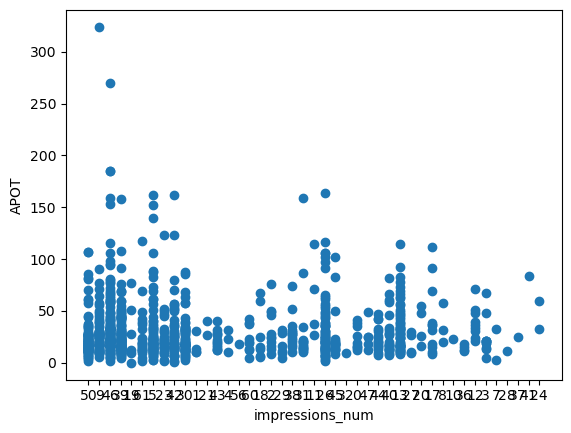

In [9]:
plt.scatter(df.impressions_num, df.APOT)
plt.xlabel('impressions_num')
plt.ylabel('APOT')
plt.show()

In [10]:
# re-shaping data

X = df.index.values.reshape(-1, 1)

In [11]:
X[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [12]:
# The shape of X is 1000 samples, with 1 feature (column)
X.shape

(1000, 1)

In [13]:
y = df.APOT

In [14]:
# Create a model with scikit-learn
model = LinearRegression()

In [15]:
# fitting the data into the model

model.fit(X, y)

LinearRegression()

In [16]:
# predicting y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(1000,)


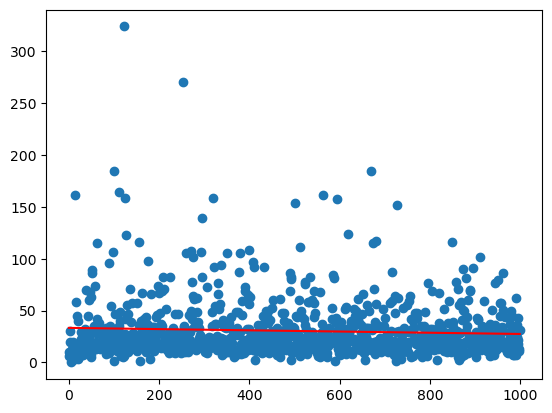

In [17]:
# results plotted with a line of best fit

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [18]:
# printing the slope and the y-intercept

print(model.coef_)
print(model.intercept_)

[-0.0058581]
33.367692947052944
